# Script OCR / HTR using Tesseract :
---
## Références : 

- https://github.com/madmaze/pytesseract
- https://nanonets.com/blog/ocr-with-tesseract/
    

## Overview : 
---

### OCR with Pytesseract and OpenCV :

    Pytesseract is a wrapper for Tesseract-OCR Engine. It is also useful as a stand-alone invocation script to tesseract, as it can read all image types supported by the Pillow and Leptonica imaging libraries, including jpeg, png, gif, bmp, tiff, and others. More info about Python approach read here. The code for this tutorial can be found in this repository.

### Installation procedure :  

- Cf. https://tesseract-ocr.github.io/tessdoc/
- https://www.pyimagesearch.com/2017/07/03/installing-tesseract-for-ocr/?_ga=2.202938193.153945777.1634822141-1390258564.1632657546    

### Référence code utilisé :

- https://github.com/NanoNets/ocr-with-tesseract/blob/master/tesseract-tutorial.ipynb

---

In [11]:
import cv2 
import pytesseract
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
# in terminal : conda install -c conda-forge pytesseract

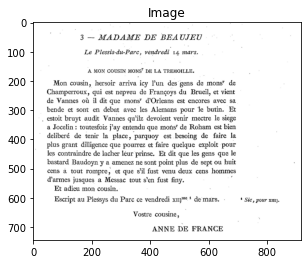

In [9]:
img_directory = '/Users/adesacy/Desktop/OCR/data/'

# Plot original image

image = cv2.imread(img_directory + '16.04.44.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('Image')
plt.show()




In [10]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'


print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
/ 3 ~ MADAME DE BEAUJEU
Le Plessis-du-Pare, vendredi 14 mars.
A MON COUSIN MONS" DE LA TREMOILLE. .
Mon cousin, hersoir arriva icy l'un des gens de mons" de
Champerroux, qui est nepveu de Francoys du Brueil, et vient
de Vannes ot il dit que mons" d’Orleans est encores avec sa
bende et sont en debat avec les Alemans pour je butin. Et
. estoit bruyt audit Vannes qu’ilz devoient venir mectre le siege
a Jocelin : toutesfoiz j’ay entendu que mons" de Roham est bien ,
deliberé de tenir la place, parquoy est besoing de faire la
_ plus grant diligence que pourrez et faire quelque exploit pour
les contraindre de lacher leur prinse. Et dit que les gens que le
bastard Baudoyn y a amenez ne sont point plus de sept ou huit .
cens a tout rompre, et que sil fust venu deux cens hommes
d’armes jusques a Messac tout s’en fust finy. ‘
Et adieu mon cousin.
Escript au Plessys du Pare ce v

In [24]:
# List files :

files = [f for f in listdir(img_directory) if isfile(join(img_directory, f))]
print(files)

['16.09.14.png', '16.10.35.png', '16.08.44.png', '16.04.44.png', '16.08.35.png', '16.12.45.png', '16.11.02.png', '16.12.52.png', '16.13.16.png', '16.10.47.png', '16.11.07.png', '16.12.57.png', '16.08.24.png', '16.08.03.png', '16.13.33.png', '16.13.23.png', '16.05.47.png', '16.05.53.png', '16.07.41.png', '16.10.58.png', '16.05.35.png', '16.12.16.png']


In [41]:
# looping over to OCR : 

from PIL import Image 

def one_scan(files):
    im = Image.open(img_directory + files)
    return pytesseract.image_to_string(im)

In [42]:
one_scan(files[0])

'114 — MONS” DE BEAUJEU\nAngers, dimanche 8 juin. ©\nA MON COUSIN , MONS" DE LA TREMOILLE.\n\nMon cousin, il me semble que, en ensuivant ce que le Roy\nvous escript, ferez bien de vous en venir devers luy pour.\nplusieurs choses que l\'on vous dira vous venu; mais avant\nvostre partement donnez bon ordre par tout. Et a Dieu, mon\ncousin, qui vous doint ce que desirez.\n\nEscript a Angiers le xx1"* jour de juing.\n\nVostre cousin ,\nPIERRE\n\x0c'

In [45]:
# Loop et sauvegarde dans une liste results :

results = []

for i in files:
    scan = one_scan(i)
    results.append(scan)

In [46]:
print(results)

['ET DE SES CONSEILLERS. 77\n\n66 — MONS’ DE BEAUJEU\n\nChinon , jeudi 1%" mai.\n\nA MON COUSIN MONS" DE LA TRIMOILLE.\n\nMon cousin, je me recommande a vous. J’ay receu voz lectres\net veu ce que vous et Mess* qui sont 1a avez escript au Roy par\nle cappitaine Raoul de Launay, et oy bien au long le rapport qu\'il\na fait de vostre part. Le Roy vous renvoye Merlin, lequel a esté\npresent a oyr parler et debatre des matieres, qui yous en ‘dira. Si\nle vueillez croire et, en ensuivant ce que le Roy vous escript, lui\nfaire savoir vostre advis et ce qu’il vous en semblera, et aussi des\nnouvelles et de.ce qui vous surviendra. Et a Dieu, mon cousin ,\nqui vous ait en sa saincte garde,\n\nEscript a Chinon le premier jour de may.\nVostre cousin ,\nPIERRE\n\x0c', '114 — MONS” DE BEAUJEU\nAngers, dimanche 8 juin. ©\nA MON COUSIN , MONS" DE LA TREMOILLE.\n\nMon cousin, il me semble que, en ensuivant ce que le Roy\nvous escript, ferez bien de vous en venir devers luy pour.\nplusieurs choses que 

In [47]:
# Export txt : 

with open("Output.txt", "w", encoding="utf-8") as text_file:
    text_file.write("\n".join(map(str, results)))